In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import deque
import matplotlib.patches as patches
from matplotlib import style

In [45]:
class NFA:
    def __init__(self,input_file):
        self._generate_graph(input_file)

    def _generate_graph(self,input_file):
        f=open(input_file)
        lines=f.readlines()
        lines[-1]+="\n"
        
        states,alphabet,start_state,final_states=lines[:4]
        
        self.states=states[:-1].split()
        self.alphabet=alphabet[:-1].split()
        self.start_state=start_state[:-1]
        self.final_states=final_states[:-1].split()

        self.dead_states=[]
        self.transitions=defaultdict(list)

        for line in lines[4:]:
            current_state,symbol,next_state=line[:-1].split()
            self.transitions[(current_state,symbol)].append(next_state)

    def generate_key(self,l):
        return tuple(sorted(list(set(l))))

    def find_transition(self,node,symbol):
        temp=[]
        for subnode in node:
            temp.extend(self.transitions[(subnode,symbol)])
        return self.generate_key(temp)
            
    def convert(self):
        new_transitions=defaultdict(list)
        new_states=[tuple(self.start_state)]
        queue=deque()
        queue.append(tuple(self.start_state))
        visited=set()
        
        count=0 #
        while queue and count<10: #
            print(queue)  #
            count+=1      #
            node=queue.popleft()
            visited.add(self.generate_key(node))
            for symbol in self.alphabet:
                transition=self.find_transition(node,symbol)
                if transition not in visited:
                    queue.append(transition)
                    new_states.append(transition)
                new_transitions[(node,symbol)]=transition

        self.transitions=new_transitions
        self.states=new_states
        finals=[]
        for state in new_states:
            for final in self.final_states:
                if final in state:
                    finals.append(state)
                    break
        self.final_states=finals
        self.start_state=tuple(self.start_state)
        return self.states

    def print_transitions(self):
        for key,val in self.transitions.items():
            print(f"{key}:{val}")

    def plot(self):
        graph=nx.MultiDiGraph()
        for state in self.states:
            graph.add_node(state,shape="circle")

        edges=defaultdict(list)
        for key,value in self.transitions.items():
            edges[(key[0],value)].append(key[1])
    
        for key,value in edges.items():
            graph.add_edge(key[0],key[1],label=",".join(value))

        pos=nx.spring_layout(graph)
        nx.draw(graph,pos,with_labels=True,node_size=2000,arrows=True)
        nx.draw_networkx_edge_labels(graph, pos,edge_labels=edges, connectionstyle='arc3,rad=0.1')
        #nx.draw_networkx_edge_labels(graph, pos, edge_labels=edges,connectionstyle='arc3, rad = 0.1')
        nx.draw_networkx_nodes(graph, pos, nodelist=[self.start_state], node_color='lightgreen', node_size=2000)
        nx.draw_networkx_nodes(graph, pos, nodelist=self.final_states, node_color='yellow', node_size=2000)

        #plt.legend(["Start State","Final State"])
        plt.show()

In [46]:
nfa=NFA("NFA_Input.txt")

In [47]:
nfa.start_state

'0'

In [48]:
nfa.print_transitions()

('0', 'a'):['0', '1']
('0', 'b'):['0']
('1', 'b'):['2']


In [49]:
nfa.convert()

deque([('0',)])
deque([('0', '1')])
deque([('0', '2')])


[('0',), ('0', '1'), ('0', '2')]

In [50]:
nfa.print_transitions()

(('0',), 'a'):('0', '1')
(('0',), 'b'):('0',)
(('0', '1'), 'a'):('0', '1')
(('0', '1'), 'b'):('0', '2')
(('0', '2'), 'a'):('0', '1')
(('0', '2'), 'b'):('0',)


In [51]:
nfa.final_states

[('0', '2')]

In [52]:
nfa.start_state

('0',)

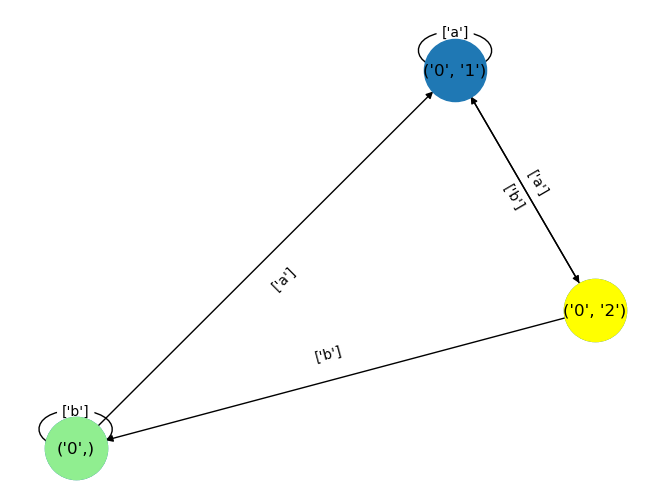

In [53]:
nfa.plot()

In [54]:
nfa2=NFA("NFA_Input2.txt")

In [55]:
nfa2.print_transitions()

('0', 'a'):['0']
('0', 'b'):['1']
('1', 'a'):['1', '2']
('1', 'b'):['1']
('2', 'a'):['2']
('2', 'b'):['2', '1']


In [56]:
nfa2.convert()

deque([('0',)])
deque([('1',)])
deque([('1', '2')])


[('0',), ('1',), ('1', '2')]

In [57]:
nfa2.print_transitions()

(('0',), 'a'):('0',)
(('0',), 'b'):('1',)
(('1',), 'a'):('1', '2')
(('1',), 'b'):('1',)
(('1', '2'), 'a'):('1', '2')
(('1', '2'), 'b'):('1', '2')


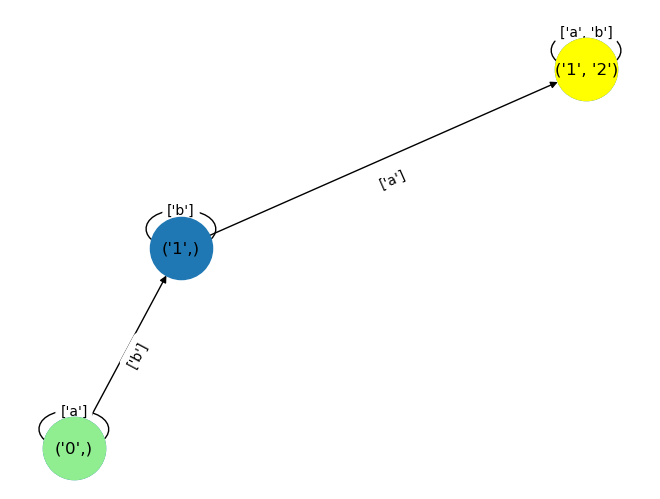

In [58]:
nfa2.plot()